# Walmart Stocks 2025



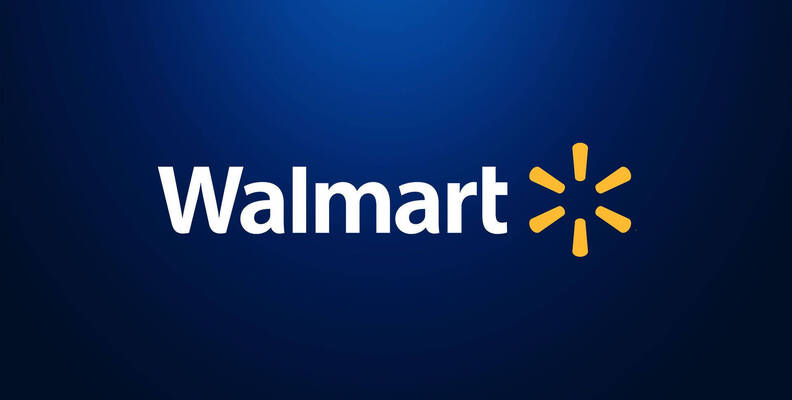

### Walmart Stocks Data 1972 to 2025

### 🏢 About Walmart
Walmart Inc. is a multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores. It is one of the world's largest companies by revenue and a key player in the retail sector. Walmart's stock is actively traded on major stock exchanges, making it an interesting subject for financial analysis.

### Dataset Overview


Link: https://www.kaggle.com/datasets/meharshanali/walmart-stocks-data-2025/data

In [55]:
# Importing the dependencies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 1️⃣ Data Preprocessing & Cleaning
- Load data using Pandas
- Handle missing values (if any)
- Check data types and format them properly
- Convert date column into a datetime format

In [56]:
# Loading the data with pandas

walmart_stocks = pd.read_csv('walmart_stock_prices.csv')

walmart_stocks.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [57]:
# Checking the tail of the dataset

walmart_stocks.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
13228,2025-02-14 00:00:00-05:00,105.300003,105.300003,103.599998,104.040001,14109500,0.0,0.0
13229,2025-02-18 00:00:00-05:00,103.720001,103.989998,102.510002,103.779999,18247300,0.0,0.0
13230,2025-02-19 00:00:00-05:00,103.849998,104.199997,102.550003,104.000000,18508000,0.0,0.0
13231,2025-02-20 00:00:00-05:00,98.779999,100.120003,96.680000,97.209999,55450900,0.0,0.0
13232,2025-02-21 00:00:00-05:00,96.529999,96.849998,94.120003,94.779999,34972500,0.0,0.0


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


Text(0.5, 1.0, 'Missing values in the dataset')

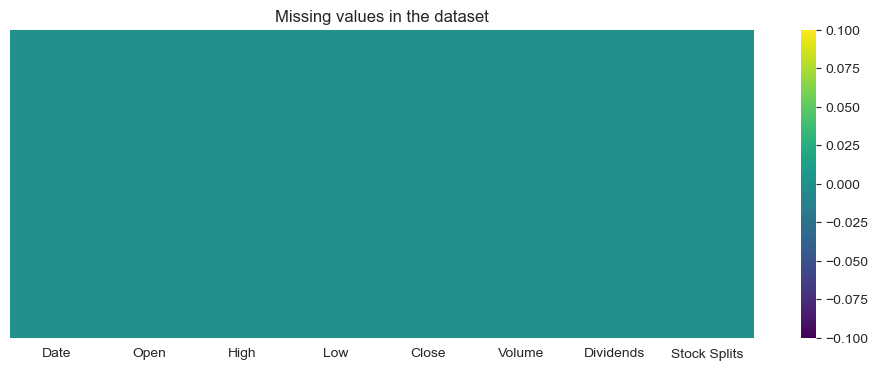

In [58]:
# Handling missing values

missing_value = walmart_stocks.isnull().sum()
print(missing_value)

# Visualizing the missing values
plt.figure(figsize=(12,4))
sns.heatmap(walmart_stocks.isnull(), cmap= 'viridis', yticklabels=False)
plt.title('Missing values in the dataset')

In [59]:
# Checking the data types 
walmart_stocks.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [60]:
# Converting the date column to string values
walmart_stocks['Date'] = walmart_stocks['Date'].astype('str')

In [61]:
# Splitting the date column int date and time
walmart_stocks['Date'].str.split(' ')


0        [1972-08-25, 00:00:00-04:00]
1        [1972-08-28, 00:00:00-04:00]
2        [1972-08-29, 00:00:00-04:00]
3        [1972-08-30, 00:00:00-04:00]
4        [1972-08-31, 00:00:00-04:00]
                     ...             
13228    [2025-02-14, 00:00:00-05:00]
13229    [2025-02-18, 00:00:00-05:00]
13230    [2025-02-19, 00:00:00-05:00]
13231    [2025-02-20, 00:00:00-05:00]
13232    [2025-02-21, 00:00:00-05:00]
Name: Date, Length: 13233, dtype: object

In [62]:
walmart_stocks['Time'] = walmart_stocks['Date'].str.split(' ').str[1]
walmart_stocks['Date'] = walmart_stocks['Date'].str.split(' ').str[0]

In [63]:
walmart_stocks.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Time
0,1972-08-25,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0,00:00:00-04:00
1,1972-08-28,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0,00:00:00-04:00
2,1972-08-29,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0,00:00:00-04:00
3,1972-08-30,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0,00:00:00-04:00
4,1972-08-31,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0,00:00:00-04:00


In [64]:
# converting the date column to datetime
walmart_stocks['Date'] = pd.to_datetime(walmart_stocks['Date'])
walmart_stocks.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Time                    object
dtype: object

In [65]:
# Extracting year, month, and day from the date column

walmart_stocks['Year'] = walmart_stocks['Date'].dt.year
walmart_stocks['Month'] = walmart_stocks['Date'].dt.month
walmart_stocks['Day'] = walmart_stocks['Date'].dt.day

walmart_stocks.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Time,Year,Month,Day
0,1972-08-25,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0,00:00:00-04:00,1972,8,25
1,1972-08-28,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0,00:00:00-04:00,1972,8,28
2,1972-08-29,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0,00:00:00-04:00,1972,8,29
3,1972-08-30,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0,00:00:00-04:00,1972,8,30
4,1972-08-31,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0,00:00:00-04:00,1972,8,31


### 2️⃣ Descriptive Statistics & Summary
- Calculate key statistical measures like mean, median, standard deviation, and interquartile range (IQR)
- Identify stock price trends over time
- Check data distribution and skewness

In [66]:
# Describe -----> statistical summary of the dataset
walmart_stocks.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
count,13233.000000,13233.000000,13233.000000,13233.000000,1.323300e+04,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000
mean,11.942685,12.047041,11.840625,11.946184,2.244184e+07,0.000922,0.001587,1998.367113,6.546286,15.743520
std,15.857590,15.979783,15.739790,15.865461,1.839004e+07,0.011606,0.058295,15.150740,3.441381,8.746771
min,0.002839,0.002839,0.002617,0.002839,0.000000e+00,0.000000,0.000000,1972.000000,1.000000,1.000000
25%,0.331929,0.335493,0.329170,0.332387,1.190220e+07,0.000000,0.000000,1985.000000,4.000000,8.000000
50%,7.361626,7.430911,7.237296,7.350794,1.875690e+07,0.000000,0.000000,1998.000000,7.000000,16.000000
75%,14.864691,15.031126,14.768921,14.910342,2.801850e+07,0.000000,0.000000,2011.000000,10.000000,23.000000
max,105.300003,105.300003,103.599998,105.050003,3.955008e+08,0.208000,3.000000,2025.000000,12.000000,31.000000


In [67]:
# Interquartile Range (IQR) -----> Identifying the spread of the data

Q1 = walmart_stocks.select_dtypes(include='float').quantile(0.25)
Q3 = walmart_stocks.select_dtypes(include='float').quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open            14.532762
High            14.695633
Low             14.439750
Close           14.577955
Dividends        0.000000
Stock Splits     0.000000
dtype: float64


In [68]:
# Detection of Outliers -----> Identifying extreme values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print('-' * 30)
print(upper_bound)

Open           -21.467215
High           -21.707956
Low            -21.330455
Close          -21.534546
Dividends        0.000000
Stock Splits     0.000000
dtype: float64
------------------------------
Open            36.663834
High            37.074575
Low             36.428546
Close           36.777275
Dividends        0.000000
Stock Splits     0.000000
dtype: float64


In [69]:
outliers = (walmart_stocks.select_dtypes(include='float') < lower_bound) | (walmart_stocks.select_dtypes(include='float') > upper_bound)
outliers.sum()

Open            1274
High            1254
Low             1273
Close           1263
Dividends        202
Stock Splits      10
dtype: int64

Text(0, 0.5, 'Close Price')

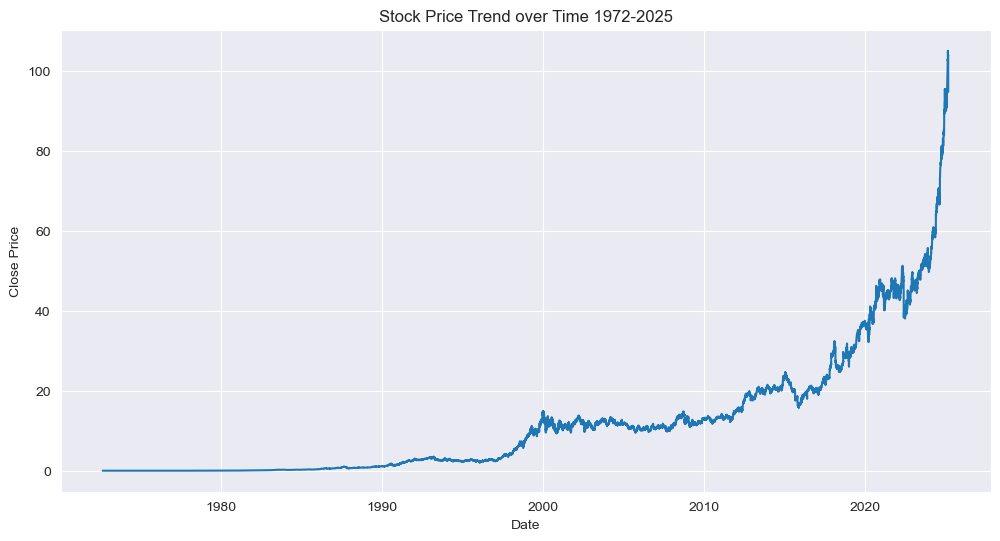

In [70]:
# Identifying stock price trends over time 
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.plot(walmart_stocks['Date'], walmart_stocks['Close'])
plt.title('Stock Price Trend over Time 1972-2025')
plt.xlabel('Date')
plt.ylabel('Close Price')

2.0968618961726206


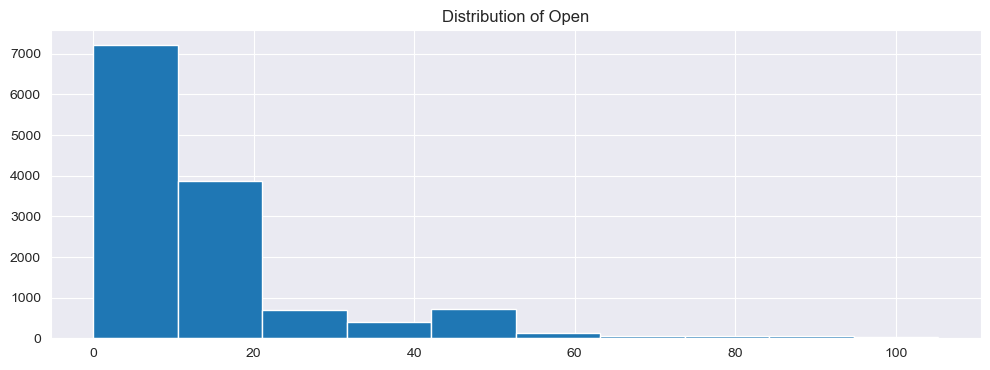

2.094812869960527


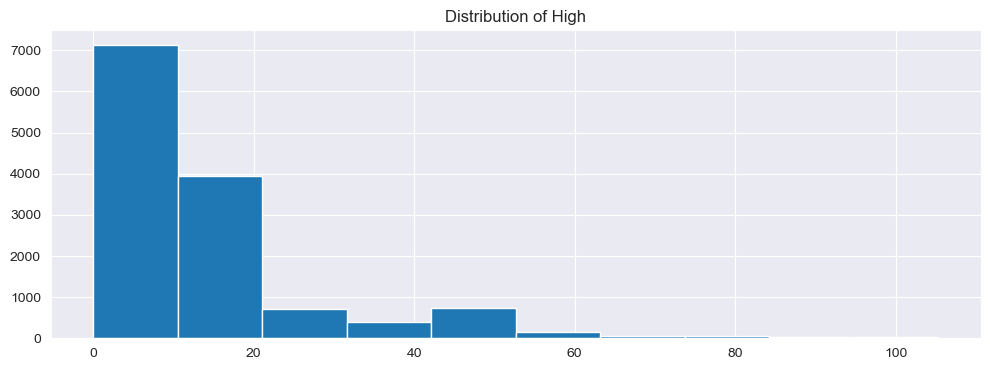

2.097454121854726


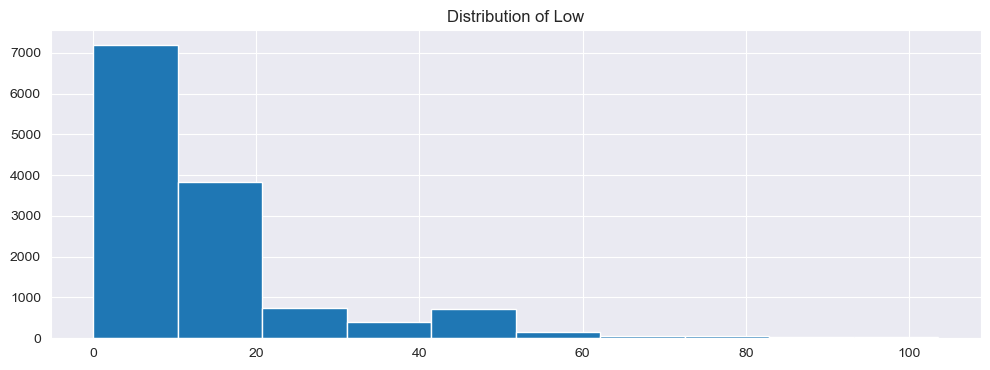

2.0985633735826976


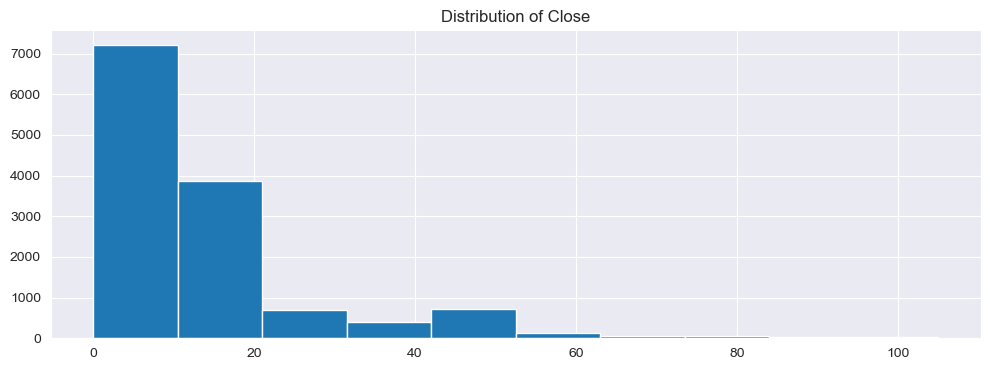

14.110643773275298


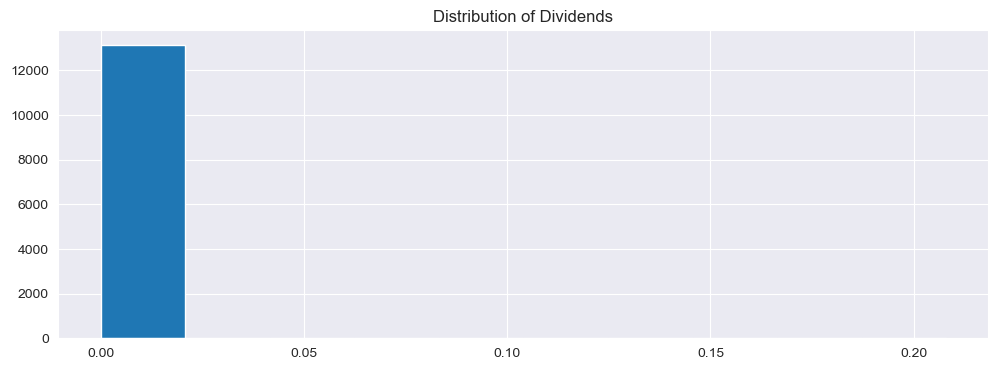

37.69094794270522


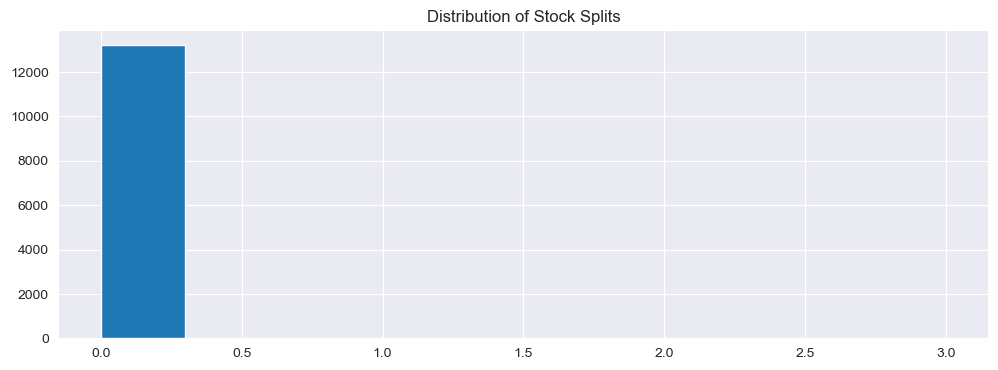

In [71]:
# Checking data distribution and skewness
for i in walmart_stocks.select_dtypes(include='float').columns:
    plt.figure(figsize=(12,4))
    print(walmart_stocks[i].skew())
    plt.hist(walmart_stocks[i])
    plt.title(f'Distribution of {i}')
    plt.show()

## 3️⃣ Data Visualizations
-  Line Plot – Analyze trends in closing prices over time.
-  Box Plot – Detect potential outliers in stock prices.
-  Histogram – Understand the distribution of closing prices.
-  Moving Averages – Use short-term and long-term moving averages to observe stock trends.
-  Correlation Heatmap – Find relationships between stock market indicators.

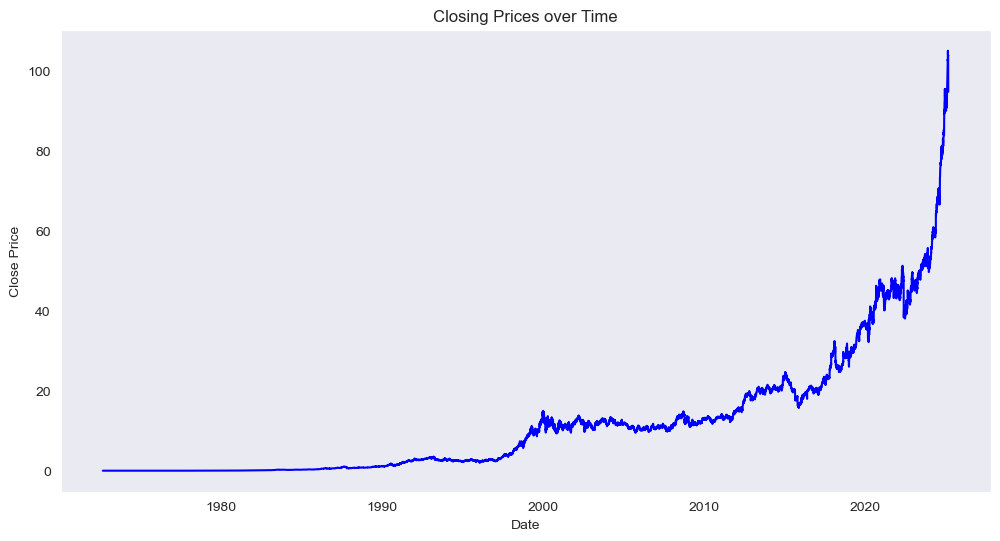

In [72]:
# Analyzing trends in closing prices over time 
plt.figure(figsize=(12,6))
plt.plot(walmart_stocks['Date'], walmart_stocks['Close'], color='blue')
plt.title('Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()

In [73]:
# Moving averages 

short_window = 20
long_window = 50

walmart_stocks['SMA_Short'] = walmart_stocks['Close'].rolling(window=short_window).mean()
walmart_stocks['SMA_Long'] = walmart_stocks['Close'].rolling(window=long_window).mean()

In [74]:
walmart_stocks.sample(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Time,Year,Month,Day,SMA_Short,SMA_Long
5482,1994-05-09,2.543804,2.556717,2.517978,2.530891,9031800,0.0,0.0,00:00:00-04:00,1994,5,9,2.588999,2.728697
611,1975-01-30,0.005234,0.005456,0.005234,0.005323,10444800,0.0,0.0,00:00:00-05:00,1975,1,30,0.004505,0.003826
4305,1989-09-12,1.022256,1.028585,1.015926,1.015926,9016800,0.0,0.0,00:00:00-04:00,1989,9,12,1.045699,1.039687
6470,1998-04-06,5.507055,5.507055,5.273987,5.287305,15831600,0.0,0.0,00:00:00-04:00,1998,4,6,5.393697,5.002310
6637,1998-12-02,7.965033,8.031798,7.851533,7.911622,11304000,0.0,0.0,00:00:00-05:00,1998,12,2,7.732691,7.101631
3443,1986-04-16,0.512137,0.521477,0.505910,0.521477,20841600,0.0,0.0,00:00:00-05:00,1986,4,16,0.488165,0.450951
1134,1977-02-24,0.009690,0.009690,0.009600,0.009600,998400,0.0,0.0,00:00:00-05:00,1977,2,24,0.009757,0.010224
8543,2006-07-03,10.793704,10.861518,10.646774,10.753016,27291900,0.0,0.0,00:00:00-04:00,2006,7,3,10.825237,10.720552
1314,1977-11-10,0.012296,0.012477,0.012296,0.012477,12979200,0.0,0.0,00:00:00-05:00,1977,11,10,0.012196,0.011993
10647,2014-11-10,21.330217,21.745422,21.281368,21.558172,37921500,0.0,0.0,00:00:00-05:00,2014,11,10,20.763440,20.785069


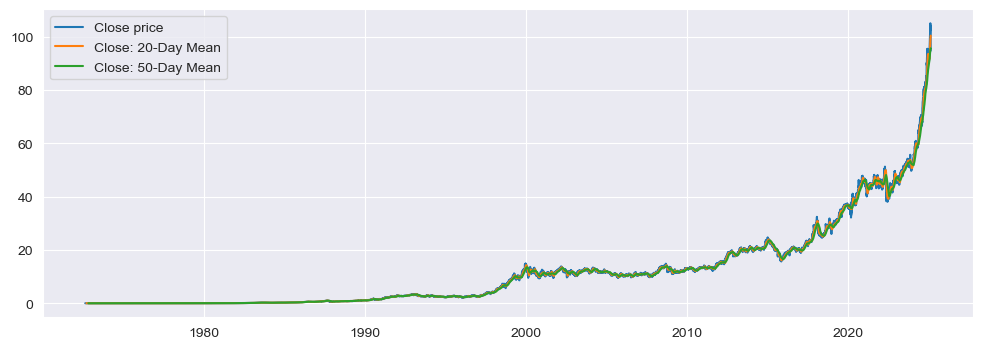

In [75]:
plt.figure(figsize=(12,4))
plt.plot(walmart_stocks['Date'], walmart_stocks['Close'], label='Close price')
plt.plot(walmart_stocks['Date'], walmart_stocks['SMA_Short'], label='Close: 20-Day Mean')
plt.plot(walmart_stocks['Date'], walmart_stocks['SMA_Long'], label='Close: 50-Day Mean')
plt.legend()

In [76]:
walmart_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Time', 'Year', 'Month', 'Day', 'SMA_Short',
       'SMA_Long'],
      dtype='object')

              Close      Open      High       Low  SMA_Short  SMA_Long
Close      1.000000  0.999911  0.999958  0.999956   0.999241  0.998271
Open       0.999911  1.000000  0.999954  0.999955   0.999310  0.998320
High       0.999958  0.999954  1.000000  0.999936   0.999303  0.998344
Low        0.999956  0.999955  0.999936  1.000000   0.999258  0.998273
SMA_Short  0.999241  0.999310  0.999303  0.999258   1.000000  0.999366
SMA_Long   0.998271  0.998320  0.998344  0.998273   0.999366  1.000000
--------------------------------------------------------------------------------


<AxesSubplot:>

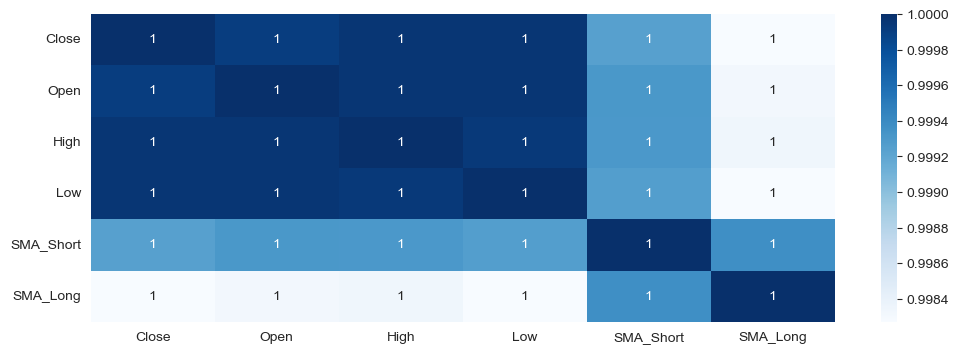

In [77]:
# Checking the correlation between stock market indicators
columns_to_correlate = ['Close', 'Open', 'High', 'Low', 'SMA_Short', 'SMA_Long']

correlation = walmart_stocks[columns_to_correlate].corr()
print(correlation)

print('-' * 80)
plt.figure(figsize=(12,4))

sns.heatmap(correlation, annot=True, cmap='Blues')

## 4️⃣ Model Building

- Building a Linear Regression Model

  - y = mx + c ; where 
  
      y = dependent variable

      x = independent variable

      m = slope / coefficient of x

      c = intercept 

In [78]:
# Separating the walmart_stocks into x and y -- independent and dependent variables

x = walmart_stocks[['Open', 'High', 'Low']]
y = walmart_stocks['Close']
print(x.head())
print('-' * 70)
print(y.head())

       Open      High       Low
0  0.011463  0.011683  0.011463
1  0.011639  0.011727  0.011595
2  0.011551  0.011551  0.011463
3  0.011463  0.011463  0.011374
4  0.011374  0.011374  0.011286
----------------------------------------------------------------------
0    0.011639
1    0.011595
2    0.011463
3    0.011463
4    0.011286
Name: Close, dtype: float64


In [79]:
# Splitting the data into training and testing sets and scaling the features

scaler = StandardScaler()
scaledx = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaledx, y, test_size= 0.2, random_state=42)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10586, 3)

(2647, 3)

(10586,)

(2647,)

In [80]:
# Building the Linear Regression Model
regress = LinearRegression()
regress.fit(x_train, y_train)

LinearRegression()

In [81]:
y_pred = regress.predict(x_test)
display(y_test, y_pred)

12149    43.870407
8355      9.791068
9040     13.423307
63        0.012344
9311     11.739640
           ...    
3068      0.268756
9468     13.065125
5493      2.414677
13028    59.729240
1056      0.009942
Name: Close, Length: 2647, dtype: float64

array([4.41916798e+01, 9.84656046e+00, 1.34536406e+01, ...,
       2.42407497e+00, 5.96625292e+01, 7.77937132e-03])

In [82]:
# Evaluating the model

print(r2_score(y_test, y_pred))

0.9999660196369335


In [98]:
coefficient = regress.coef_
coefficient

array([-8.48208561, 12.2841259 , 12.06319398])

### Observation
- Open: The coef(-8.48) shows that when all features are stable or constant and 'Open' variable increases by 1, the close (which is the output variable) will reduce by -8.48
- High: The coef(12.28) shows that when all features are stable and 'High' increases by 1, the Close will increase by 12.28
- Low: The coef(12.06) shows that when all features are stable and 'Low' increases by 1, the 'Close' will increase by 12.06

### Intercept

In [100]:
intercept = regress.intercept_
intercept

11.945959060273685

### Overfitting

- Train - Very good accuracy
- Test - Bad accuracy

### Underfitting

- Train - Low model accuracy
- Test - High model accuracy

## Regularization

- L1 Regularization ----> Lasso
- L2 Regularization ----> Ridge



## Lasso Regression

- It is used to reduce the features. It helps in feature selection

In [84]:
from sklearn.linear_model import Lasso
L1_reg = Lasso(alpha=0.1)
L1_reg.fit(x_train, y_train)

Lasso(alpha=0.1)

In [85]:
training_l1_pred = L1_reg.predict(x_train)
print(training_l1_pred)

print('-' * 70)

testing_l1_pred = L1_reg.predict(x_test)
print(testing_l1_pred)

[ 0.08207192 11.59160638  0.09652204 ...  2.75138901  0.08263729
 10.82762427]
----------------------------------------------------------------------
[43.97420978  9.89323741 13.18483241 ...  2.43448202 59.39510104
  0.08232273]


In [86]:
# Checking the accuracy of the model

accuracy_on_training_l1 = r2_score(y_train, training_l1_pred)
print('L1 Training Score: ', accuracy_on_training_l1)

accuracy_on_testing_l1 = r2_score(y_test, testing_l1_pred)

print('L1 Testing Score: ', accuracy_on_testing_l1)

L1 Training Score:  0.9997864626942531
L1 Testing Score:  0.9997742097236607


### Ridge



In [87]:
from sklearn.linear_model import Ridge
L2_reg = Ridge(alpha=0.1)
L2_reg.fit(x_train, y_train)

Ridge(alpha=0.1)

In [88]:
training_l2_pred = L2_reg.predict(x_train)
print(training_l2_pred)

print('-' * 70)

testing_l2_pred = L2_reg.predict(x_test)
print(testing_l2_pred)

[7.59177525e-03 1.13623723e+01 2.18793814e-02 ... 2.65814953e+00
 8.03890796e-03 1.10086777e+01]
----------------------------------------------------------------------
[4.41898654e+01 9.85021047e+00 1.34252394e+01 ... 2.41865187e+00
 5.96651980e+01 7.72139453e-03]


In [89]:
# Checking the accuracy of the model

accuracy_on_training_l2 = r2_score(y_train, training_l2_pred)
print('L2 Training Score: ', accuracy_on_training_l2)

accuracy_on_testing_l2 = r2_score(y_test, testing_l2_pred)

print('L2 Testing Score: ', accuracy_on_testing_l2)

L2 Training Score:  0.9999622843288434
L2 Testing Score:  0.9999625042573571
